In [1]:
import numpy as np
# from RandomWalk import RandomWalk
import math
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import random

warnings.filterwarnings("error")

In [28]:
def to_states(ind):
    obs = [0, 0, 0, 0, 0]
    obs[ind] = 1
    return obs
    
def random_walk(start_state, training_size, sequence_size):
    observations = []
    
    for n in range(training_size):
        ins = []
        for i in range(sequence_size):
            obs = []
            ss = start_state
            while ss != 5 and ss != -1:
                obs.append(to_states(ss)) 
                ss += random.choice([-1, 1]) 
            ins.append(obs)
        observations.append(ins)
    
    return observations  

lambda:  0.0  alpha:  0.01
at lmda =  0.0  --> rsme in best alpha =  0.09707899193550958 | alpha =  0.01  | weights =  [0.48456776 0.66216304 0.76330468 0.87591529 0.92905746]
lambda:  0.1  alpha:  0.01
at lmda =  0.1  --> rsme in best alpha =  0.09829658554364357 | alpha =  0.01  | weights =  [0.48538113 0.66175804 0.76477143 0.8811764  0.93412156]
lambda:  0.2  alpha:  0.01
at lmda =  0.2  --> rsme in best alpha =  0.09989654337770049 | alpha =  0.01  | weights =  [0.48682289 0.66084974 0.76580935 0.88653972 0.93927094]
lambda:  0.3  alpha:  0.01
at lmda =  0.3  --> rsme in best alpha =  0.10181268055113293 | alpha =  0.01  | weights =  [0.48695413 0.65764557 0.76522194 0.89139559 0.94416484]
lambda:  0.4  alpha:  0.01
at lmda =  0.4  --> rsme in best alpha =  0.10411955415499057 | alpha =  0.01  | weights =  [0.48525095 0.65182107 0.76321382 0.89612434 0.94909876]
lambda:  0.5  alpha:  0.01
at lmda =  0.5  --> rsme in best alpha =  0.10680383339523271 | alpha =  0.01  | weights =  [

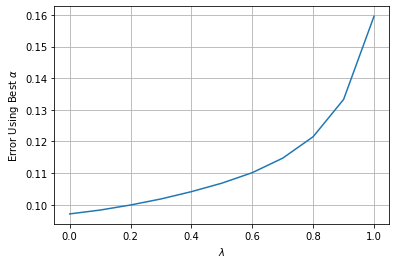

In [31]:
def run_exp1():
    lmda = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    rsmes = []
    start_state = 2 
    training_size = 100
    sequence_size = 10 

    #0.005,0.01,0.02,0.03,
    #alpha = [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01]  
    alpha = [0.01]
    epsilon = 0.001 
    
    rw = random_walk(start_state, training_size, sequence_size)

    for lam in lmda:
        min_rsme = 100 
        min_alpha = 0 
        for aph in alpha:
            print("lambda: ", lam, " alpha: ", aph)
            weights, rsme, se = get_predictions(lam, rw, training_size, sequence_size, aph, epsilon)
            if rsme < min_rsme:
                min_rsme = rsme 
                min_alpha = aph
        rsmes.append(min_rsme)
#         rsmes.append(rsme)
        print('at lmda = ', lam, ' --> rsme in best alpha = ', min_rsme, '| alpha = ', min_alpha, ' | weights = ', weights)
    plt.plot(lmda, rsmes)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'Error Using Best $\alpha$')
    plt.grid(True)
    plt.show()

def get_predictions(lam, rw, training_size, sequence_size, alpha, epsilon):
    
    # perform experiment on random walk to replicate figure 3 results
    rsme_list = []
    
    for i in range(training_size):
        weights = [0.5, 0.5, 0.5, 0.5, 0.5]
        observations = rw[i]
        converged = False
        # stop whether all the weights converges 
        while not converged:
            # update weights after one training set
            delta_w = 0     
            for j in range(sequence_size):
                obs = observations[j]
                for t in range(1, len(obs) + 1):
                    ind = t - 1              
                    p_t = np.dot(weights, obs[ind]) 
                    
                    # calculate next timestep t+1
                    p_tn1 = get_p_tn1(obs, ind, weights)
                    
                    discount_delta_w = 0
                    
                    for k in range(1, t + 1): 
                        temp = np.multiply(lam ** (t - k), obs[k - 1])
                        discount_delta_w = np.add(temp, discount_delta_w)
                        
                    dw = np.multiply(alpha * (p_tn1 - p_t), discount_delta_w)
                    delta_w += dw
            converged = np.all(np.abs(delta_w) < epsilon)
            weights += delta_w        
        err = compute_error(weights)
        rsme_list.append(err)
    stdev = np.std(rsme_list, ddof=1)
    se = stdev / math.sqrt(len(rsme_list))
    return weights, np.mean(rsme_list), se

def compute_error(weights):
    expected = np.array([1.0/6, 1.0/3, 1.0/2, 2.0/3, 5.0/6])
    rsme = math.sqrt(np.mean(np.power(np.subtract(weights, expected), 2)))
    return rsme

def get_p_tn1(obs, ind, weights):
    if ind == len(obs) - 1:
        # at last observation of sequence
        if obs[ind] == [0,0,0,0,1]:
            return 1
        elif obs[ind] == [1,0,0,0,0]:
            return 0
    else:
        # not last observation of sequence
        return np.dot(weights, obs[ind + 1])

if __name__ == '__main__':
    run_exp1()